In [73]:
import numpy as np

from helper import show_plots_helper as show

### Самописная реализация FFT

In [74]:
def my_fft(t: np.array):
    n = len(t)
    if n <= 1:
        return t

    even = my_fft(t[0::2])
    odd = my_fft(t[1::2])

    w = [np.exp(-2j * np.pi * k / n) * odd[k] for k in range(n // 2)]

    spectrum = [even[k] + w[k] for k in range(n // 2)] + [even[k] - w[k] for k in range(n // 2)]

    return spectrum

## Задание №1

### Задаем функцию

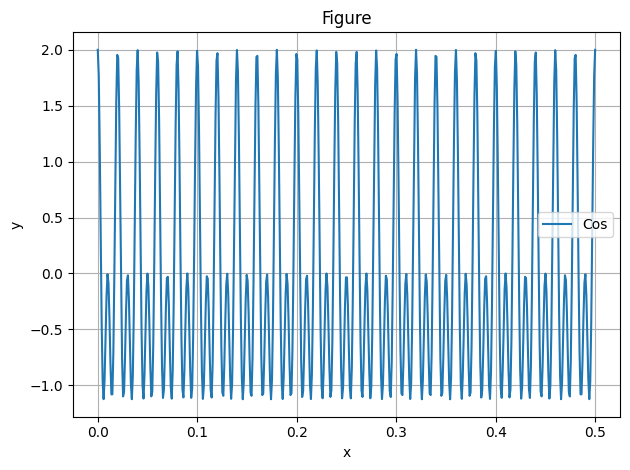

In [75]:
args = np.linspace(0, 0.5, 2 ** 9)

cos_wave = np.cos(100 * 2 * np.pi * args) + np.cos(50 * 2 * np.pi * args)
show([args], [cos_wave], ['Cos'])

### Находим спектр функции и смотрим, измениться ли форма сигнала после обратного преобразования

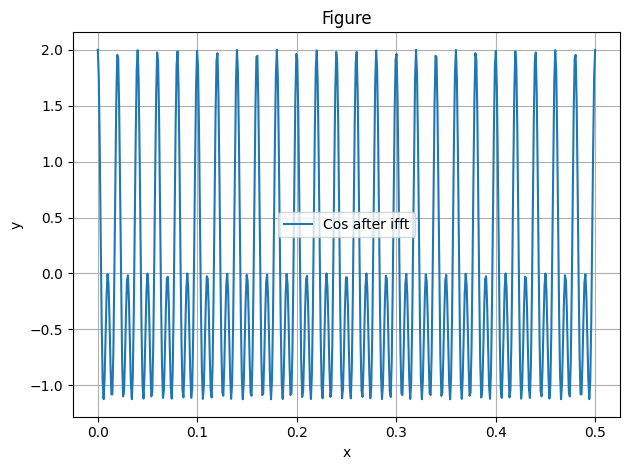

In [76]:
spectrum = np.fft.fft(cos_wave)

# See that function doesn't change
function = np.fft.ifft(spectrum)
show([args], [function], ['Cos after ifft'])

### Ищем спектр функции через самописную версию fft

In [77]:
# Finding spectrum with my implementation of fft
new_spectrum = my_fft(cos_wave)
freq = np.fft.fftfreq(len(args), 0.5 / (pow(2, 9)))

### Сравниваем спектры

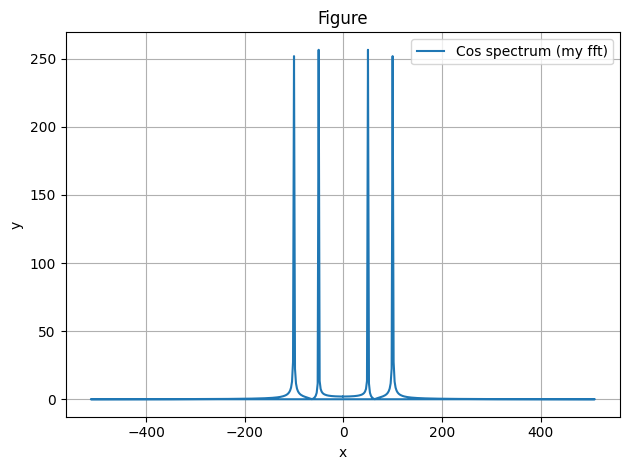

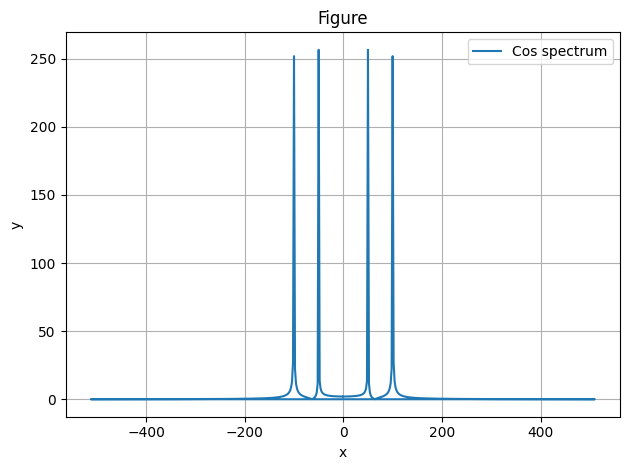

In [78]:
# Compare spectrum
show([freq], [np.abs(new_spectrum)], ['Cos spectrum (my fft)'])
show([freq], [np.abs(spectrum)], ['Cos spectrum'])

### Добавляем шум к сигналу, смотрим, как изменился спектр и сам сигнал

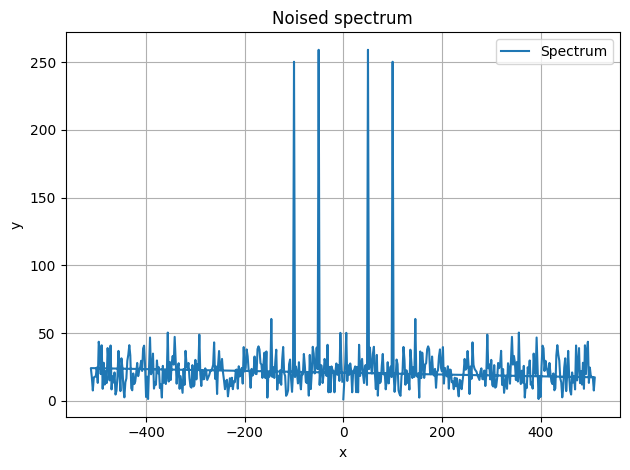

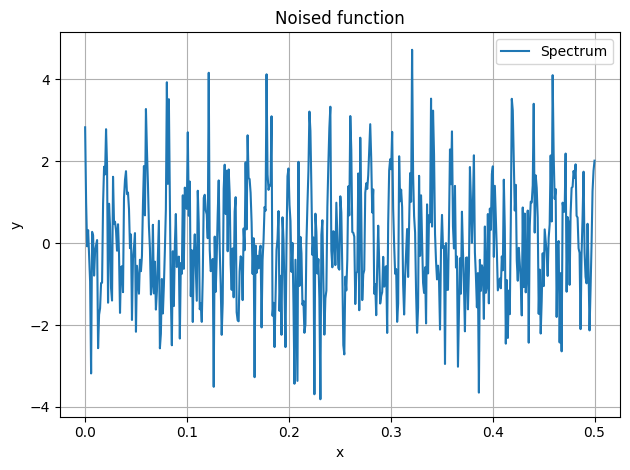

In [79]:
# Adding gaussian noise and see spectrum's changing
noise = np.random.normal(0, 1, len(args))
noise_wave = noise + cos_wave
noised_spectrum = np.fft.fft(noise_wave)

# Show noised spectrum
show([freq], [np.abs(noised_spectrum)],
                  ['Spectrum'], window_title='Noised spectrum')

# Show noised signal
noised_function = np.fft.ifft(noised_spectrum)
show([args], [noised_function],
     ['Spectrum'], window_title='Noised function')

## Задание №2

### Функция прямоугольного импульса

In [80]:
def rect_impulse(amplitude: float, period: float, x: float) -> float:
    """
    Square-wave function
    """
    if (x % period) < (period / 2):
        return amplitude
    else:
        return -amplitude

### Строим последовательность прямоугльных импульсов с периодом 2 и амплитудой 2 на промежутке от 0 до 4 

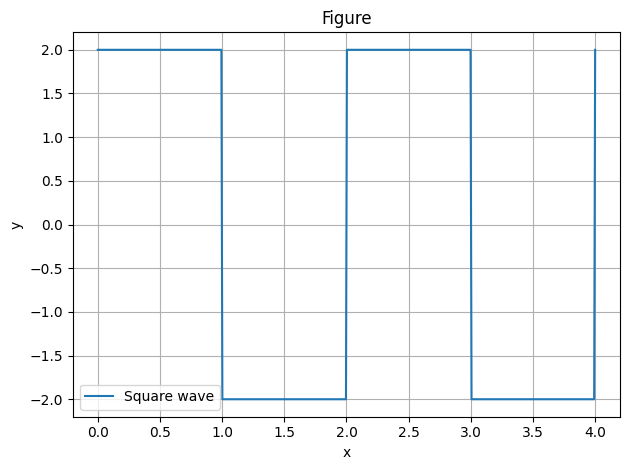

In [81]:
amplitude = 2
period = 2

args = np.linspace(0, 4, 2 ** 9)
square_wave = [rect_impulse(amplitude, period, i) for i in args]

show([args], [square_wave], ['Square wave'])

### Выводим спектр

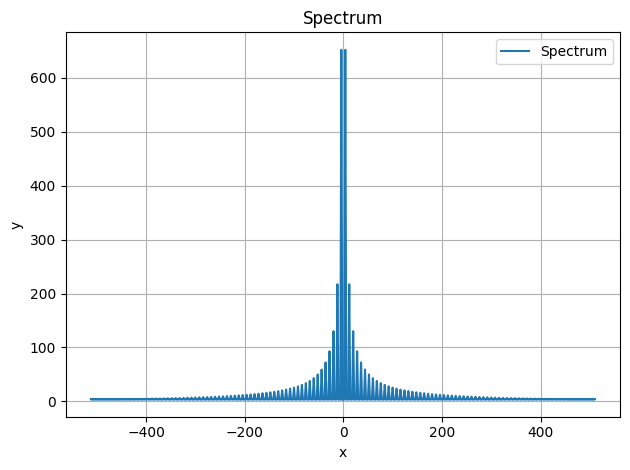

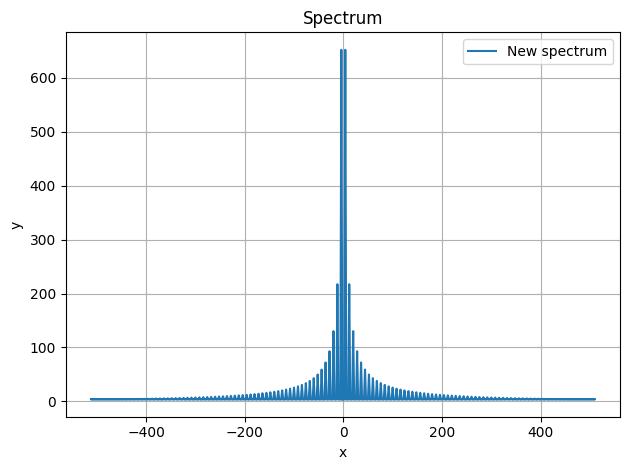

In [82]:
spectrum = np.fft.fft(square_wave)
new_spectrum = my_fft(square_wave)

show([freq], [np.abs(spectrum)], ['Spectrum'], window_title='Spectrum')
show([freq], [np.abs(new_spectrum)], ['New spectrum'], window_title='Spectrum')

### Строим и выводим зашумлённый спектр

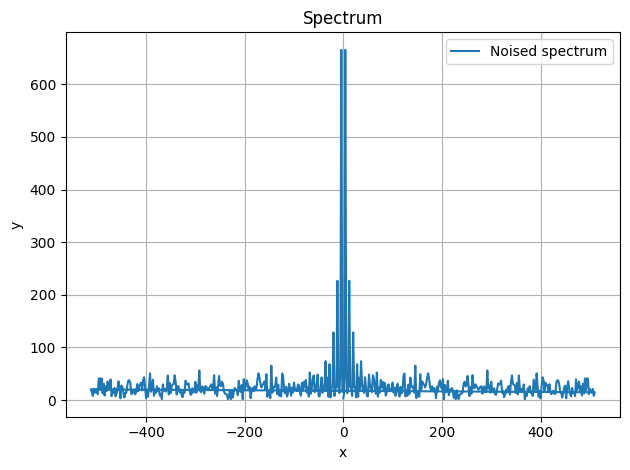

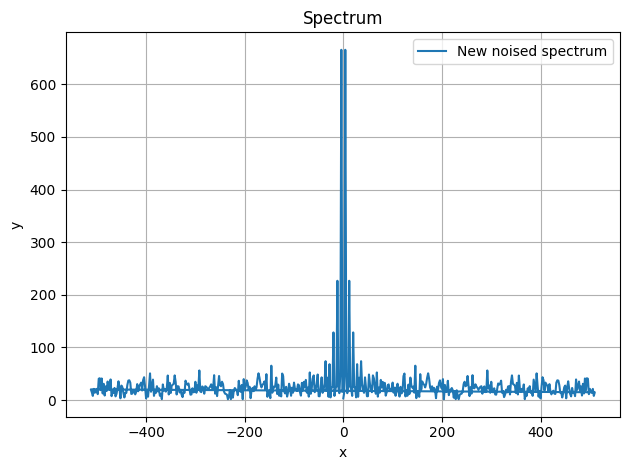

In [83]:
square_wave = square_wave + noise

noised_spectrum = np.fft.fft(square_wave)
noised_new_spectrum = my_fft(square_wave)

show([freq], [np.abs(noised_spectrum)], ['Noised spectrum'], window_title='Spectrum')
show([freq], [np.abs(noised_new_spectrum)], ['New noised spectrum'], window_title='Spectrum')

## Задание №3

### Сравнение времени

In [84]:
args = np.linspace(0, 2 * np.pi * 10, 2 ** 9)
cos_wave = np.cos(args)

### Время вычисления с помощью встроенной функции fft

In [85]:
%%time
spectrum = np.fft.fft(cos_wave)

CPU times: user 112 µs, sys: 70 µs, total: 182 µs
Wall time: 324 µs


### Время вычисления с помощью самописной функции fft

In [86]:
%%time
new_spectrum = my_fft(cos_wave)

CPU times: user 9.74 ms, sys: 0 ns, total: 9.74 ms
Wall time: 9.21 ms
